In [1]:
print("bonjourno")

bonjourno


In [66]:
#importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords
import re
import string
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [63]:
# COLUMNS
# Field Name				Definition
# RefID				        Unique (sequential) number assigned to vehicles
# IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
# PurchDate				The Date the vehicle was Purchased at Auction
# Auction					Auction provider at which the  vehicle was purchased
# VehYear					The manufacturer's year of the vehicle
# VehicleAge				The Years elapsed since the manufacturer's year
# Make					Vehicle Manufacturer 
# Model					Vehicle Model
# Trim					Vehicle Trim Level
# SubModel				Vehicle Submodel
# Color					Vehicle Color
# Transmission				Vehicles transmission type (Automatic, Manual)
# WheelTypeID				The type id of the vehicle wheel
# WheelType				The vehicle wheel type description (Alloy, Covers)
# VehOdo					The vehicles odometer reading
# Nationality				The Manufacturer's country
# Size					The size category of the vehicle (Compact, SUV, etc.)
# TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
# MMRAcquisitionAuctionAveragePrice	Acquisition price for this vehicle in average condition at time of purchase	
# MMRAcquisitionAuctionCleanPrice		Acquisition price for this vehicle in the above Average condition at time of purchase
# MMRAcquisitionRetailAveragePrice	Acquisition price for this vehicle in the retail market in average condition at time of purchase
# MMRAcquisitonRetailCleanPrice		Acquisition price for this vehicle in the retail market in above average condition at time of purchase
# MMRCurrentAuctionAveragePrice		Acquisition price for this vehicle in average condition as of current day	
# MMRCurrentAuctionCleanPrice		Acquisition price for this vehicle in the above condition as of current day
# MMRCurrentRetailAveragePrice		Acquisition price for this vehicle in the retail market in average condition as of current day
# MMRCurrentRetailCleanPrice		Acquisition price for this vehicle in the retail market in above average condition as of current day
# PRIMEUNIT				Identifies if the vehicle would have a higher demand than a standard purchase
# AcquisitionType				Identifies how the vehicle was aquired (Auction buy, trade in, etc)
# AUCGUART				The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
# KickDate				Date the vehicle was kicked back to the auction
# BYRNO					Unique number assigned to the buyer that purchased the vehicle
# VNZIP                                   Zipcode where the car was purchased
# VNST                                    State where the the car was purchased
# VehBCost				Acquisition cost paid for the vehicle at time of purchase
# IsOnlineSale				Identifies if the vehicle was originally purchased online
# WarrantyCost                            Warranty price (term=36month  and millage=36K) 



# Data preprocessing

# Moje kolumny: 12-17, 29-33

In [2]:
df = pd.read_csv('training.csv')

In [21]:
df.head()

,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,33619,FL,7100.0,0,1113
1,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,33619,FL,7600.0,0,1053
2,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,33619,FL,4900.0,0,1389
3,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,33619,FL,4100.0,0,630
4,2.0,Covers,69367,AMERICAN,COMPACT,FORD,33619,FL,4000.0,0,1020


In [4]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [18]:
df = df.iloc[:,[12,13,14,15,16,17,29,30,31,32,33]]

In [19]:
df.dtypes

WheelTypeID             float64
WheelType                object
VehOdo                    int64
Nationality              object
Size                     object
TopThreeAmericanName     object
VNZIP1                    int64
VNST                     object
VehBCost                float64
IsOnlineSale              int64
WarrantyCost              int64
dtype: object

In [24]:
df.head()

,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,33619,FL,7100.0,0,1113
1,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,33619,FL,7600.0,0,1053
2,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,33619,FL,4900.0,0,1389
3,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,33619,FL,4100.0,0,630
4,2.0,Covers,69367,AMERICAN,COMPACT,FORD,33619,FL,4000.0,0,1020


In [35]:
df.shape

(72983, 11)

# NA

In [73]:
df.isna().sum()

WheelTypeID             0
WheelType               0
VehOdo                  0
Nationality             0
Size                    0
TopThreeAmericanName    0
VNZIP1                  0
VNST                    0
VehBCost                0
IsOnlineSale            0
WarrantyCost            0
dtype: int64

In [ ]:
# TopThreeAmericanName -> replace with OTHER

In [36]:
df[['TopThreeAmericanName']].value_counts()

TopThreeAmericanName
GM                      25314
CHRYSLER                23399
FORD                    12315
OTHER                   11950
dtype: int64

In [42]:
df['TopThreeAmericanName'] = df['TopThreeAmericanName'].fillna('OTHER')

C:\Users\Uzytkownik\AppData\Local\Temp\ipykernel_7044\261704098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TopThreeAmericanName'] = df['TopThreeAmericanName'].fillna('OTHER')


In [37]:
df[['Size']].value_counts()

Size       
MEDIUM         30785
LARGE           8850
MEDIUM SUV      8090
COMPACT         7205
VAN             5854
LARGE TRUCK     3170
SMALL SUV       2276
SPECIALTY       1915
CROSSOVER       1759
LARGE SUV       1433
SMALL TRUCK      864
SPORTS           777
dtype: int64

In [40]:
#Zastąpmy medium
df['Size'] = df['Size'].fillna('MEDIUM')

C:\Users\Uzytkownik\AppData\Local\Temp\ipykernel_7044\3081036828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].fillna('MEDIUM')


In [74]:
df[['Nationality']].value_counts()

Nationality   
AMERICAN          58443
OTHER ASIAN        7617
TOP LINE ASIAN     3555
OTHER               194
dtype: int64

In [45]:
df['Nationality'] = df['Nationality'].fillna('OTHER')

C:\Users\Uzytkownik\AppData\Local\Temp\ipykernel_7044\2989242704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nationality'] = df['Nationality'].fillna('OTHER')


In [30]:
#WheelTypeId ===> The type id of the vehicle wheel

In [29]:
df[['WheelTypeID']].value_counts()

WheelTypeID
1.0            36050
2.0            33004
3.0              755
0.0                5
dtype: int64

In [47]:
df[['WheelType']].value_counts()

WheelType
Alloy        36050
Covers       33004
Special        755
dtype: int64

In [53]:
df[(df['WheelTypeID'].isna() ) & (df['WheelType'].isna() )]

,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
39,NaN,NaN,65078,AMERICAN,SPORTS,FORD,33619,FL,8500.0,0,728
41,NaN,NaN,86889,TOP LINE ASIAN,COMPACT,OTHER,33619,FL,5200.0,0,594
45,NaN,NaN,72191,TOP LINE ASIAN,MEDIUM SUV,OTHER,33619,FL,7100.0,0,569
47,NaN,NaN,79576,TOP LINE ASIAN,COMPACT,OTHER,33619,FL,3900.0,0,869
49,NaN,NaN,50227,AMERICAN,MEDIUM,GM,33619,FL,7500.0,0,1003
...,...,...,...,...,...,...,...,...,...,...,...
72915,NaN,NaN,68426,AMERICAN,MEDIUM,CHRYSLER,30212,GA,7300.0,0,1020
72924,NaN,NaN,53132,OTHER ASIAN,COMPACT,OTHER,30212,GA,6000.0,0,505
72933,NaN,NaN,81794,AMERICAN,VAN,CHRYSLER,30212,GA,3400.0,0,2063
72959,NaN,NaN,74151,AMERICAN,MEDIUM SUV,GM,30212,GA,6600.0,0,1506


In [54]:
df = df[df['WheelTypeID'].notna()]

In [57]:
df = df[df['WheelType'].notna()]

In [58]:
df.shape

(69809, 11)

In [77]:
df[['VNST']].value_counts()

VNST
TX      13201
FL      10093
CA       6705
NC       6607
AZ       5959
CO       4848
SC       3965
OK       3400
GA       2332
TN       1624
VA       1605
MD       1125
PA        836
UT        814
MO        756
OH        755
AL        653
NV        542
MS        490
IA        457
IN        454
IL        440
LA        329
NJ        316
WV        283
NM        225
KY        209
OR        195
ID        182
WA        131
NH         97
MN         62
AR         59
NE         26
MA         15
MI         13
NY          6
dtype: int64

In [79]:
df[['IsOnlineSale']].value_counts()

IsOnlineSale
0               68083
1                1726
dtype: int64

# Visualization

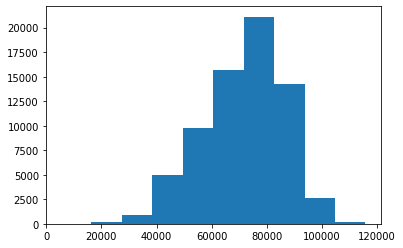

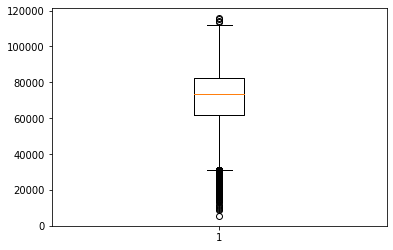

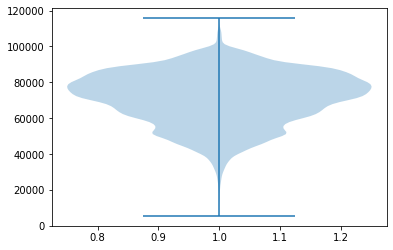

In [72]:
plt.hist(df['VehOdo'])
plt.show()

plt.boxplot(df['VehOdo'])
plt.show()

plt.violinplot(df['VehOdo'])
plt.show()

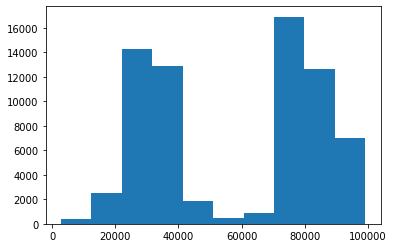

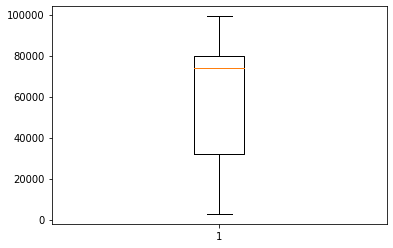

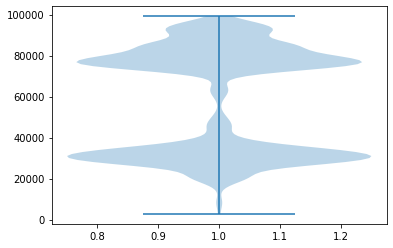

In [75]:
plt.hist(df['VNZIP1'])
plt.show()

plt.boxplot(df['VNZIP1'])
plt.show()

plt.violinplot(df['VNZIP1'])
plt.show()

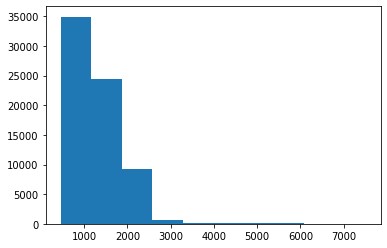

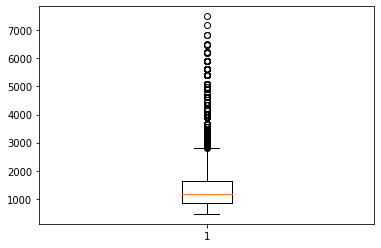

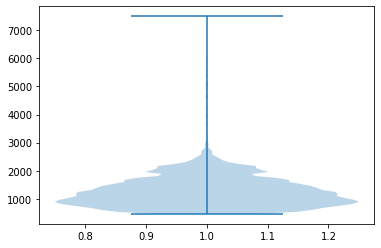

In [80]:
plt.hist(df['WarrantyCost'])
plt.show()

plt.boxplot(df['WarrantyCost'])
plt.show()

plt.violinplot(df['WarrantyCost'])
plt.show()

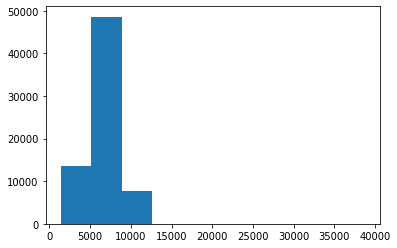

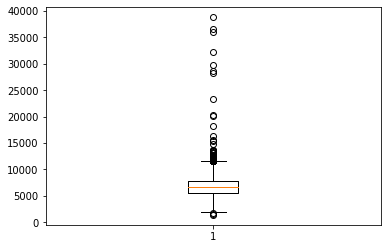

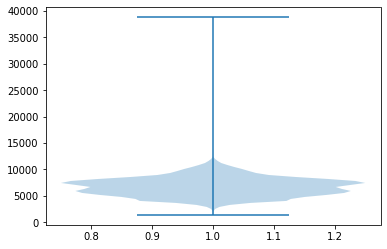

In [81]:
plt.hist(df['VehBCost'])
plt.show()

plt.boxplot(df['VehBCost'])
plt.show()

plt.violinplot(df['VehBCost'])
plt.show()

# Cleaned -> preprocess now

In [82]:
# 
# WheelType  - OneHotEncoding (3 categories) -> ORDER MATTERS?
# WheelTypeID  - OneHotEncoding (3 categories)  -> ORDER MATTERS?
# VehOdo - standaryzacja/normalizacja, nie ma za bardzo odstajacych wartosci 
# Nationality - OneHotEncoding (4 categories) -> OTHER present -> ORDER DOES NOT MATTER
# Size - (12 categories) --> ??? Lepiej onehotencoding dla malej liczby kategorii czy wiekszej? => ORDER HERE MATTERS -> 
# --- wiec tutaj lepiej nie one hot encoding tylko jakis label encoding z ustalona kolejnoscia, ale niekiedy trudno powiedziec?
# --- moze jakis inny pomysl?
# TopThreeAmericanName - (4 categories). OTHER present -> OHE? -> Order does not matter
# VNZIP1 -> ORDER DOES NOT MATTER, ZIPCODE, Standaryzacja/normalizacja nie ma sensu, --?> CO TUTAJ
# VNST -> Categorical, lots of categories, OHE? Worth doing? Order does not matter
# VehBCost -> Cena -> standaryzacja, normalizacja? Ale wykres mocno krzywy
# IsOnlineSale -> binarny -> ???
# WarrantyCost